Problem statment
The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements, in order to achive this use the daatset in the relative diretcotry ./Datasets/la_jobs.csv, and this is the decomentation for the useful columns you should use:

FILE_NAME: The bulletins file name.
JOB_CLASS_TITLE: Job title.
JOB_CLASS_NO: Job number.
JOB_DUTIES: The duties of this job.
EDUCATION_YEARS: Number of education yeras needed to apply for this job.
SCHOOL_TYPE: The type of school you need to study in.
EDUCATION_MAJOR: The eductaion major you study in this school.
EXPERIENCE_LENGTH: The number of experience years needed to apply for this job.
FULL_TIME_PART_TIME: If the job is full time or part time or both.
EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
COURSE_COUNT: Number of courses needed to apply for this job.
COURSE_LENGTH: The course length in years or months.
COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
EXAM_TYPE: Type of exams neededin the hiring process.
ENTRY_SALARY: Salary range in this job.
OPEN_DATE: Date at it the job bulliten got open.
REQUIREMENT_SET_TEXT: The requirments set need for this job in points.
The goal is to answer the following questions-

-Impute / Replace Missing Values with median because The median is usually preferred with outliers than mean
-Replace missing values in SCHOOL_TYPE with the most frequent value
-change type of OPEN_DATE column

Q1:
A non-experienced job seeker wants to know what is the best job for him?

Q2:
A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

Q3:
What the best time in the year to be ready for a job applying in any experience level?

Q4:
Is experience more important than educational level?

Q5:
Which fresh grade job that will guarantee many job offers in the future for him?

Q6:
"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER "

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments column above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?


In [27]:
import pandas as pd
dff=pd.read_csv("la_jobs.csv")
dff.isnull().sum()


Unnamed: 0                 0
FILE_NAME                  0
JOB_CLASS_TITLE            0
JOB_CLASS_NO               0
REQUIREMENT_SET_ID         0
REQUIREMENT_SUBSET_ID      0
JOB_DUTIES                 0
EDUCATION_YEARS            0
SCHOOL_TYPE                0
EDUCATION_MAJOR            0
EXPERIENCE_LENGTH          0
FULL_TIME_PART_TIME        0
EXP_JOB_CLASS_TITLE        0
EXP_JOB_CLASS_ALT_RESP     0
EXP_JOB_CLASS_FUNCTION     0
COURSE_COUNT               0
COURSE_LENGTH              0
COURSE_SUBJECT             0
MISC_COURSE_DETAILS        0
DRIVERS_LICENSE_REQ        0
DRIV_LIC_TYPE              0
ADDTL_LIC                  0
EXAM_TYPE                  0
ENTRY_SALARY_GEN           0
ENTRY_SALARY_DWP           0
OPEN_DATE                  0
REQUIREMENT_SET_TEXT       0
REQUIREMENT_SUBSET_TEXT    0
REQUIREMENT_CONJUNCTION    0
dtype: int64

In [30]:
dff.REQUIREMENT_SUBSET_ID .value_counts()
dff.REQUIREMENT_SUBSET_ID=dff.REQUIREMENT_SUBSET_ID.replace('-','a')
dff.REQUIREMENT_SUBSET_ID.value_counts()

REQUIREMENT_SUBSET_ID
a    1300
b      38
c      14
d       9
e       7
f       2
i       2
g       1
h       1
Name: count, dtype: int64

In [31]:
dff.JOB_DUTIES=dff.JOB_DUTIES.replace('-','A Risk Manager administers a comprehensive risk management program for a City department which may include: planning, organizing and directing the work of professional, technical, and/or clerical employees engaged in the administration of a risk management program; identifying and measuring risk exposure; developing methods for controlling risks and preventing losses; collecting and analyzing data on department risks and losses; developing work place safety training and property loss prevention programs; recommending and negotiating insurance coverage; preparing cost of risk reports; recommending risk financing techniques; administering indemnity and insurance requirements for contractors, vendors, tenants and permitees; supervising or monitoring claims administration; applying sound supervisory principles and techniques in building and maintaining an effective work force; and fulfilling equal employment opportunity responsibilities.')

In [32]:
dff.JOB_DUTIES.value_counts()

JOB_DUTIES
A Risk Manager administers a comprehensive risk management program for a City department which may include: planning, organizing and directing the work of professional, technical, and/or clerical employees engaged in the administration of a risk management program; identifying and measuring risk exposure; developing methods for controlling risks and preventing losses; collecting and analyzing data on department risks and losses; developing work place safety training and property loss prevention programs; recommending and negotiating insurance coverage; preparing cost of risk reports; recommending risk financing techniques; administering indemnity and insurance requirements for contractors, vendors, tenants and permitees; supervising or monitoring claims administration; applying sound supervisory principles and techniques in building and maintaining an effective work force; and fulfilling equal employment opportunity responsibilities.                                          

In [33]:
import numpy as np
dff.EDUCATION_YEARS.value_counts()
dff.EDUCATION_YEARS=dff.EDUCATION_YEARS.replace('-',np.nan)
x=dff.EDUCATION_YEARS.median()
print(x)
dff.EDUCATION_YEARS=dff.EDUCATION_YEARS.replace(np.nan,x)


4.0


In [34]:
dff.EDUCATION_YEARS.value_counts()

EDUCATION_YEARS
4.0    1218
4.0     145
1.0       9
2.0       2
Name: count, dtype: int64

In [35]:
dff.SCHOOL_TYPE.value_counts()

SCHOOL_TYPE
-                                                    1072
college or university                                 198
apprenticeship                                         38
trade school|college                                   18
college                                                16
trade school or university                              7
high school                                             7
high school|college                                     6
high school|trade school                                2
technical school|college                                2
high school|technical school|college                    2
law school                                              2
technical school|high school|trade school|college       1
technical school|trade school|college                   1
technical school                                        1
trade school                                            1
Name: count, dtype: int64

In [39]:
dff.SCHOOL_TYPE=dff.SCHOOL_TYPE.replace('-','college or university')
dff.SCHOOL_TYPE.value_counts()

SCHOOL_TYPE
college or university                                1270
apprenticeship                                         38
trade school|college                                   18
college                                                16
trade school or university                              7
high school                                             7
high school|college                                     6
high school|trade school                                2
technical school|college                                2
high school|technical school|college                    2
law school                                              2
technical school|high school|trade school|college       1
technical school|trade school|college                   1
technical school                                        1
trade school                                            1
Name: count, dtype: int64

In [36]:
dff.EDUCATION_MAJOR.value_counts()
dff.EDUCATION_MAJOR=dff.EDUCATION_MAJOR.replace('-','engineering')
dff.EDUCATION_MAJOR.value_counts()

EDUCATION_MAJOR
engineering                                                                                     1300
urban planning, urban studies, urban design, architecture, landscape architecture, geography       3
accounting                                                                                         2
industrial technology, industrial science or special degree program                                2
industrial/organizational psychology or psychometrics                                              2
                                                                                                ... 
journalism, english, public relations, or communications                                           1
architecture, architectural engineering, environmental design, or building science                 1
life science or education teaching credential                                                      1
life science                                                               

In [37]:
dff.EXPERIENCE_LENGTH.value_counts()
dff.EXPERIENCE_LENGTH=dff.EXPERIENCE_LENGTH.replace('-',np.nan)
y=dff.EXPERIENCE_LENGTH.median()
dff.EXPERIENCE_LENGTH=dff.EXPERIENCE_LENGTH.replace(np.nan,y)


In [38]:
dff.EXPERIENCE_LENGTH.value_counts()

EXPERIENCE_LENGTH
2.0     460
2.0     408
4.0     157
1.0     115
3.0     115
5.0      41
0.5      27
6.0      27
1.5       9
8.0       5
7.0       3
0.67      2
9.0       2
12.0      1
2.5       1
0.25      1
Name: count, dtype: int64

In [40]:
dff.FULL_TIME_PART_TIME.value_counts()

FULL_TIME_PART_TIME
full time              963
-                      408
full time|part time      2
part time                1
Name: count, dtype: int64

In [41]:
dff.FULL_TIME_PART_TIME=dff.FULL_TIME_PART_TIME.replace('-',"full time")

In [42]:
dff.FULL_TIME_PART_TIME.value_counts()

FULL_TIME_PART_TIME
full time              1371
full time|part time       2
part time                 1
Name: count, dtype: int64

In [52]:
dff.replace('-',np.nan)
dff.replace(np.nan,'-')
dff.DRIVERS_LICENSE_REQ.value_counts()
dff.DRIVERS_LICENSE_REQ=dff.DRIVERS_LICENSE_REQ.replace('-',"P")


In [54]:
dff.DRIV_LIC_TYPE.value_counts()
dff.DRIV_LIC_TYPE=dff.DRIV_LIC_TYPE.replace('-',"B")

In [56]:
dff.ADDTL_LIC.value_counts()
dff.ADDTL_LIC=dff.ADDTL_LIC.replace('-','registered nurse License')

In [57]:
dff.EXAM_TYPE.value_counts()

EXAM_TYPE
OPEN_INT_PROM    529
INT_DEPT_PROM    451
OPEN             357
DEPT_PROM         37
Name: count, dtype: int64

In [61]:
dff.ENTRY_SALARY_GEN.value_counts()
#z=dff.ENTRY_SALARY_GEN.median()
dff.ENTRY_SALARY_GEN=dff.ENTRY_SALARY_GEN.replace('-','$83,144 to $100,516')

In [64]:
dff.ENTRY_SALARY_DWP.value_counts()
dff.ENTRY_SALARY_DWP=dff.ENTRY_SALARY_DWP.replace('-','$78,905 to $98,031')

In [68]:
		
dff.REQUIREMENT_SUBSET_TEXT.value_counts()
dff.REQUIREMENT_SUBSET_TEXT=dff.REQUIREMENT_SUBSET_TEXT.replace('-',"Successful completion of a U.S. military electronics technical course of 24 weeks or longer within the last 10 years.")

In [70]:
dff.REQUIREMENT_CONJUNCTION.value_counts()
dff.REQUIREMENT_CONJUNCTION=dff.REQUIREMENT_CONJUNCTION.replace('-',"or")

In [75]:
dff.OPEN_DATE

0       04-18-14
1       04-18-14
2       04-18-14
3       06-22-18
4       07-13-18
          ...   
1369    09-14-18
1370    09-14-18
1371    07-06-18
1372    07-06-18
1373    07-06-18
Name: OPEN_DATE, Length: 1374, dtype: object

In [92]:
dff.OPEN_DATE=dff.OPEN_DATE.replace("-","09-28-18")
dff.OPEN_DATE=pd.to_datetime(dff.OPEN_DATE)
dff.OPEN_DATE

0      2014-04-18
1      2014-04-18
2      2014-04-18
3      2018-06-22
4      2018-07-13
          ...    
1369   2018-09-14
1370   2018-09-14
1371   2018-07-06
1372   2018-07-06
1373   2018-07-06
Name: OPEN_DATE, Length: 1374, dtype: datetime64[ns]

In [97]:
dff

,Unnamed: 0,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,REQUIREMENT_SET_TEXT,REQUIREMENT_SUBSET_TEXT,REQUIREMENT_CONJUNCTION
0,0,311 DIRECTOR 9206 041814.txt,311 Director,9206,1.0,a,A 311 Director is responsible for the successf...,4.0,college or university,engineering,...,P,B,registered nurse License,OPEN_INT_PROM,"$125,175 to $155,514","$78,905 to $98,031",2014-04-18,One year of full-time paid experience as a Sen...,Successful completion of a U.S. military elect...,or
1,1,311 DIRECTOR 9206 041814.txt,311 Director,9206,2.0,a,A 311 Director is responsible for the successf...,4.0,college or university,engineering,...,P,B,registered nurse License,OPEN_INT_PROM,"$125,175 to $155,514","$78,905 to $98,031",2014-04-18,A Bachelor's degree from a recognized college ...,Successful completion of a U.S. military elect...,or
2,2,311 DIRECTOR 9206 041814.txt,311 Director,9206,3.0,a,A 311 Director is responsible for the successf...,4.0,college or university,engineering,...,P,B,registered nurse License,OPEN_INT_PROM,"$125,175 to $155,514","$78,905 to $98,031",2014-04-18,Eight years of full-time paid experience in a ...,Successful completion of a U.S. military elect...,or
3,3,ACCOUNTANT 1513 062218.txt,Accountant,1513,1.0,a,An Accountant does professional accounting wor...,4.0,college or university,engineering,...,P,B,registered nurse License,OPEN,"$49,903 to $72,996","$78,905 to $98,031",2018-06-22,Graduation from an accredited four-year colleg...,Successful completion of a U.S. military elect...,or
4,4,ACCOUNTING CLERK 1223 071318.txt,Accounting Clerk,1223,1.0,a,An Accounting Clerk performs difficult and res...,4.0,trade school or university,engineering,...,P,B,registered nurse License,OPEN_INT_PROM,"$49,005 to $71,618","$78,905 to $98,031",2018-07-13,Two years of full-time paid office clerical ex...,Successful completion of a U.S. military elect...,or
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1369,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300,1.0,a,"A Zoo Curator of Education plans, develops, im...",4.0,college or university,engineering,...,P,B,registered nurse License,OPEN_INT_PROM,"$57,628 to $84,229","$78,905 to $98,031",2018-09-14,Graduation from an accredited four-year colleg...,Successful completion of a U.S. military elect...,or
1370,1370,ZOO CURATOR OF EDUCATION 4300 091418.txt,Zoo Curator Of Education,4300,2.0,a,"A Zoo Curator of Education plans, develops, im...",4.0,college or university,engineering,...,P,B,registered nurse License,OPEN_INT_PROM,"$57,628 to $84,229","$78,905 to $98,031",2018-09-14,Current employment with the City of Los Angele...,Successful completion of a U.S. military elect...,or
1371,1371,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290,1.0,a,A Zoo Registrar assists in the development and...,4.0,college or university,"zoology, biology",...,P,B,registered nurse License,OPEN_INT_PROM,"$55,666 to $81,390","$78,905 to $98,031",2018-07-06,Graduation from an accredited four-year colleg...,Successful completion of a U.S. military elect...,or
1372,1372,ZOO REGISTRAR 4290 070618.txt,Zoo Registrar,4290,2.0,a,A Zoo Registrar assists in the development and...,4.0,college or university,engineering,...,P,B,registered nurse License,OPEN_INT_PROM,"$55,666 to $81,390","$78,905 to $98,031",2018-07-06,Two years of full-time paid experience supervi...,Successful completion of a U.S. military elect...,or


Q1:
A non-experienced job seeker wants to know what is the best job for him?


ValueError: could not convert string to float: '311 Director'

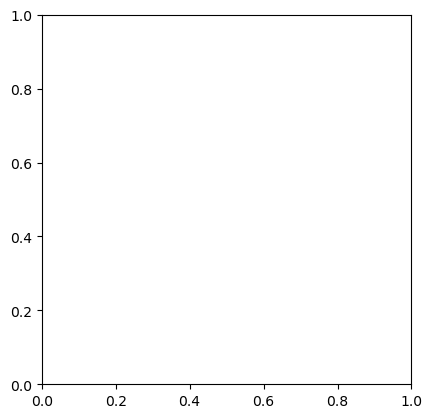

In [96]:
import matplotlib.pyplot as plt
x=dff.JOB_CLASS_TITLE



Q2:
A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?



Q3:
What the best time in the year to be ready for a job applying in any experience level?



Q4:
Is experience more important than educational level?



Q5:
Which fresh grade job that will guarantee many job offers in the future for him?



Q6:
"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER "

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments column above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?